# Tensors and Operations

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

print(torch.__version__)

2.0.0+rocm5.4.2


In [3]:
# 0 dimensional tensor (scalar)
s = torch.tensor(7)
s.ndim, s.shape, s

(0, torch.Size([]), tensor(7))

In [4]:
# 1 dimensional tensor (vector)
t1 = torch.Tensor([1,2,3,4,5])
t1.ndim, t1.shape, print(t1)

tensor([1., 2., 3., 4., 5.])


(1, torch.Size([5]), None)

In [5]:
# 2 dimensional tensor (matrix)
t2 = torch.Tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

t2.ndim, t2.shape, print(t2)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


(2, torch.Size([3, 3]), None)

In [6]:
# random, zeros and ones
r = torch.rand(size = (3, 3))
print(r)

z = torch.zeros(size = (3, 1))
print(z)

o = torch.ones(size = (1, 3))
print(o)

tensor([[0.0703, 0.8720, 0.0893],
        [0.2675, 0.4133, 0.7619],
        [0.0348, 0.2663, 0.4411]])
tensor([[0.],
        [0.],
        [0.]])
tensor([[1., 1., 1.]])


In [7]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.5634, 0.4819, 0.2712, 0.2214],
        [0.5029, 0.4160, 0.1850, 0.8282],
        [0.6851, 0.6874, 0.0208, 0.0706]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [8]:
mat1 = torch.rand(2,3)
mat2 = torch.rand(3,1)

mat1@mat2 #dot product (same as torch.matmul(mat1, mat2))

tensor([[0.0165],
        [0.6041]])

## Linear

In [9]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B.T) # (this will error)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [10]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2,  # in_features = matches inner dimension of input 
                         out_features=6,
                         bias=True) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [11]:
linear.weight, linear.bias

(Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5224,  0.0958,  0.3410, -0.0998,  0.5451,  0.1045],
        requires_grad=True))

## Min, Max, ArgMin, ArgMax.

Basically the same as numpy

In [12]:
# Create a tensor
x = torch.arange(0, 100, 10).reshape(2,5)
x

tensor([[ 0, 10, 20, 30, 40],
        [50, 60, 70, 80, 90]])

In [13]:
# require casting to float for mean
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [14]:
a = x.reshape(1, -1).squeeze()
a

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

## Simple NN

In [15]:
import torch
from torch import nn
from torch import functional as F
from torch import optim

X = torch.rand(100, 1)
w = torch.tensor([1.5]) 
b = torch.tensor([0.7])
n = torch.rand(X.shape)/10 # add some noise
y = X * w + b + n

print(X.shape, w.shape, b.shape, n.shape, y.shape)

torch.Size([100, 1]) torch.Size([1]) torch.Size([1]) torch.Size([100, 1]) torch.Size([100, 1])


<Axes: >

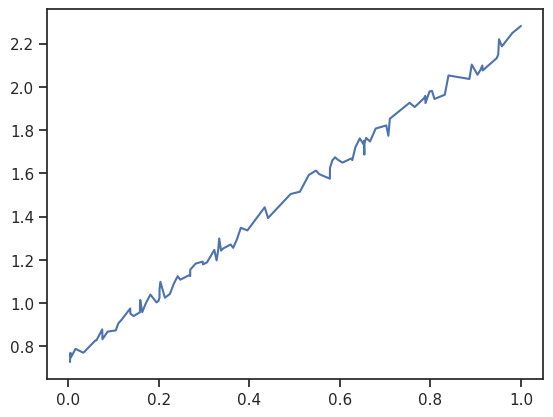

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.lineplot(x = X.squeeze(), y = y.squeeze())

In [17]:
# Define a basical linear regression model, see the different impelmentations (the classic one is commented out)
class linear_regression_model(nn.Module):
    def __init__(self):
        super(linear_regression_model, self).__init__()
        self.l1 = nn.Linear(1, 1)
        #self.w = nn.Parameter(torch.tensor(0.,), requires_grad = True)
        #self.b = nn.Parameter(torch.tensor(0.), requires_grad = True)

    def forward(self, x):
        #output = x * self.w + self.b
        output = self.l1(x)
        return output

# Define the neural network architecture
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.l1 = nn.Linear(1, 100)
        self.l2 = nn.Linear(100, 100)
        self.l3 = nn.Linear(100, 10)
        self.l4 = nn.Linear(10, 1)
        self.relu = nn.ReLU() # for non-linear use an activation
        
    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.relu(self.l3(x))
        x = self.l4(x)
        return x

In [18]:
#model = linear_regression_model()
model = NNet()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

E = 1000 # number of epochs

# Train the model
for epoch in range(E):
    running_loss = 0.0
    
    inputs, labels = X, y
    #print(inputs, labels)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad() #set gradient to 0
    loss.backward()
    optimizer.step()

    l = loss.item()
    running_loss += l
    if (epoch+1) % (E/10) == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {running_loss:.4f}')

print('Finished Training')

Epoch [100/100], Loss: 0.0510
Epoch [200/100], Loss: 0.0077
Epoch [300/100], Loss: 0.0011
Epoch [400/100], Loss: 0.0007
Epoch [500/100], Loss: 0.0007
Epoch [600/100], Loss: 0.0007
Epoch [700/100], Loss: 0.0007
Epoch [800/100], Loss: 0.0007
Epoch [900/100], Loss: 0.0007
Epoch [1000/100], Loss: 0.0007
Finished Training


In [19]:
from pytorchsummary import summary
summary(X.shape, model)

ModuleNotFoundError: No module named 'pytorchsummary'

<Axes: >

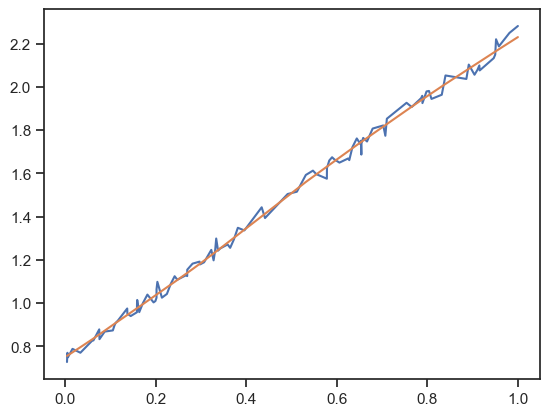

In [ ]:
# plot again
import seaborn as sns
sns.set_theme(style="ticks")

y_pred = model(X)
sns.lineplot(x = X.squeeze(), y = y.squeeze())
sns.lineplot(x = X.squeeze(), y = y_pred.squeeze().detach().numpy())

In [ ]:
## Let's try classification model
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations to be applied to the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST training set
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

# Download and load the MNIST test set
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

ModuleNotFoundError: No module named 'torchvision'

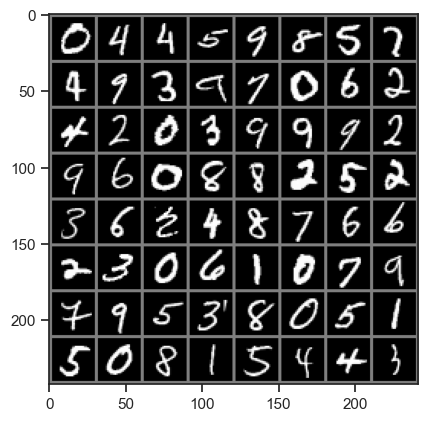

0 4 4 5 9 8 5 7 4 9 3 9 7 0 6 2 4 2 0 3 9 9 9 2 9 6 0 8 8 2 5 2 3 6 2 4 8 7 6 6 2 3 0 6 1 0 7 9 7 9 5 3 8 0 5 1 5 0 8 1 5 4 4 3


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

classes = (0,1,2,3,4,5,6,7,8,9)
batch_size = 64

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [ ]:
# building a CNN 

#orch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, 
#               groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

# for conv2d
#output_size = (input_size - kernel_size + 2*padding) / stride + 1
#output_size = (28 - 6 + 2 * 0) / 1 + 1 = 23
#output tensor then will have [64, 6, 23, 23] with weight 
# = (input_channel * kernel_size * kernel_size + 1) * output_channel = (1 * 6 *6 + 1) * 6 = 222

# for maxpool 2d
#output_size = floor((input_size - kernel_size) / stride) + 1
#  (23 - 2)/2 + 1 = 11

import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_challels = 6, out_channels = 16, kernel_size = 5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 3 * 3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = CNN()
y = model(images)

summary(images.shape[1:], model)

               Layer	Output Shape        	    Kernal Shape    	#params             	#(weights + bias)   	requires_grad
------------------------------------------------------------------------------------------------------------------------------------------------------
            Conv2d-1	[1, 6, 23, 23]      	    [6, 1, 6, 6]    	222                 	(216 + 6)           	True True 
         MaxPool2d-2	[1, 6, 11, 11]      	                    	                    	                    	          
            Conv2d-3	[1, 16, 7, 7]       	   [16, 6, 5, 5]    	2416                	(2400 + 16)         	True True 
         MaxPool2d-4	[1, 16, 3, 3]       	                    	                    	                    	          
           Flatten-5	[1, 144]            	                    	                    	                    	          
            Linear-6	[1, 120]            	     [120, 144]     	17400               	(17280 + 120)       	True True 
            Linear-7	[1, 84]      

(31052, 31052, 0)

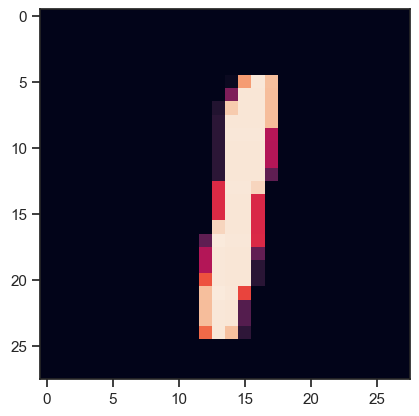

torch.Size([16, 1, 28, 28])


In [ ]:
imshow(images[0])
print(images.shape)

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.230
[1,   200] loss: 0.229
[1,   300] loss: 0.228
[1,   400] loss: 0.225
[1,   500] loss: 0.221
[1,   600] loss: 0.211
[1,   700] loss: 0.176
[1,   800] loss: 0.100
[1,   900] loss: 0.061
[2,   100] loss: 0.042
[2,   200] loss: 0.038
[2,   300] loss: 0.037
[2,   400] loss: 0.033
[2,   500] loss: 0.029
[2,   600] loss: 0.028
[2,   700] loss: 0.026
[2,   800] loss: 0.024
[2,   900] loss: 0.026
[3,   100] loss: 0.022
[3,   200] loss: 0.022
[3,   300] loss: 0.021
[3,   400] loss: 0.020
[3,   500] loss: 0.020
[3,   600] loss: 0.019
[3,   700] loss: 0.017
[3,   800] loss: 0.017
[3,   900] loss: 0.017
[4,   100] loss: 0.016
[4,   200] loss: 0.016
[4,   300] loss: 0.015
[4,   400] loss: 0.014
[4,   500] loss: 0.013
[4,   600] loss: 0.015
[4,   700] loss: 0.014
[4,   800] loss: 0.013
[4,   900] loss: 0.012
[5,   100] loss: 0.013
[5,   200] loss: 0.012
[5,   300] loss: 0.013
[5,   400] loss: 0.011
[5,   500] loss: 0.011
[5,   600] loss: 0.011
[5,   700] loss: 0.012
[5,   800] 

In [ ]:
# Test the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

NameError: name 'testloader' is not defined

In [ ]:
model(images)[7].argmax()

NameError: name 'images' is not defined

In [ ]:
torch.arange(1, 10)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
predicted!=labels

NameError: name 'predicted' is not defined

In [20]:
import torch

# Create a tensor x and a target tensor y
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0])

# Compute the mean squared error between x and y
mse = torch.mean((x - y)**2)

# Compute the gradients of the mse with respect to x
mse.backward()

# Print the gradients of x
print(x.grad)

tensor([-2., -2., -2.])


In [1]:
[1,2,3] != [1,2,4]

True